## О чем речь

- думаю что данные with crash искуственно изменены,не годны для расчета корреляций
- Здесь рассматривались данные с файлов without crash, объединяются два файла 00086Е и общие данные с 0008В9 для установки PV18
- временной ряд разбил по минутам, брал средние значения датчиков в минуту
- результат = таблица, где каждый датчик с какими датчиками максимально коррелиррует в прямую и обратную сторону

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
#import math

# Without crash

## Установка ПВ-18 / Модуль № 00086Е

1. Температура наружного воздуха (ТЕ 1 = TH)
2. Температура вытяжного воздуха (ТЕ 2 = TB)
3. Температура приточного воздуха (ТЕ 3 = TП)
4. Температура до рекуператора (ТЕ 4 = ТдР)
5. Температура после рекуператора (ТЕ 5 = ТпР)
6. Температура обратного теплоносителя (ТЕ 6 = ТО)
7. Освещённость в вент.камере О
8. Давление в обратном трубопроводе ДО
9. Давление в прямом трубопроводе ДП

In [36]:
cols = ['time','id','TN','TV', 'TP', 'TdR', 'TpR', 'TO', 'O', 'DO', 'DP']
data18 = pd.read_csv('data-0008B0-PV18.csv', names = cols, header = 0) 
len(data18)

100000

In [37]:
data18.head(3)

time      id   TN   TV   TP  TdR  TpR   TO  O    DO    DP
0  2019-03-04 12:31:56  0008B0  502  713  708  574  599  752  0  2077  2246
1  2019-03-04 12:31:18  0008B0  502  710  705  574  599  752  0  2074  2241
2  2019-03-04 12:31:11  0008B0  502  716  708  574  599  752  0  2068  2238

In [38]:
data18.time

0        2019-03-04 12:31:56
1        2019-03-04 12:31:18
2        2019-03-04 12:31:11
3        2019-03-04 12:30:41
4        2019-03-04 12:30:33
                ...         
99995    2019-01-17 14:14:07
99996    2019-01-17 14:11:30
99997    2019-01-17 14:09:09
99998    2019-01-17 14:06:48
99999    2019-01-17 13:58:37
Name: time, Length: 100000, dtype: object

In [39]:
data18.time[0][:-3]

'2019-03-04 12:31'

In [40]:
minutes = []
for i in range(len(data18)):
    minute = data18.time[i][:-3]
    minutes.append(minute)
data18['minutes'] = minutes
data18

time      id   TN   TV   TP  TdR  TpR   TO  O    DO  \
0      2019-03-04 12:31:56  0008B0  502  713  708  574  599  752  0  2077   
1      2019-03-04 12:31:18  0008B0  502  710  705  574  599  752  0  2074   
2      2019-03-04 12:31:11  0008B0  502  716  708  574  599  752  0  2068   
3      2019-03-04 12:30:41  0008B0  502  713  705  574  599  752  0  2074   
4      2019-03-04 12:30:33  0008B0  499  713  708  574  602  752  0  2080   
...                    ...     ...  ...  ...  ...  ...  ...  ... ..   ...   
99995  2019-01-17 14:14:07  0008B0  483  710  708  572  599  758  0  1785   
99996  2019-01-17 14:11:30  0008B0  480  710  702  572  599  755  0  1785   
99997  2019-01-17 14:09:09  0008B0  480  710  702  572  597  752  0  1788   
99998  2019-01-17 14:06:48  0008B0  480  710  705  569  599  749  0  1785   
99999  2019-01-17 13:58:37  0008B0  477  710  708  572  599  763  0  1782   

         DP           minutes  
0      2246  2019-03-04 12:31  
1      2241  2019-03-04 12:31  
2      2238  2019-03-04 12:31  
3      2238  2019-03-04 12:30  
4      2243  2019-03-04 12:30  
...     ...               ...  
99995  1946  2019-01-17 14:14  
99996  1946  2019-01-17 14:11  
99997  1949  2019-01-17 14:09  
99998  1946  2019-01-17 14:06  
99999  1943  2019-01-17 13:58  

[100000 rows x 12 columns]

In [41]:
data18[data18.minutes == '2019-03-04 12:30']

time      id   TN   TV   TP  TdR  TpR   TO  O    DO    DP  \
3  2019-03-04 12:30:41  0008B0  502  713  705  574  599  752  0  2074  2238   
4  2019-03-04 12:30:33  0008B0  499  713  708  574  602  752  0  2080  2243   
5  2019-03-04 12:30:11  0008B0  499  713  708  574  597  752  0  2068  2232   
6  2019-03-04 12:30:03  0008B0  502  716  708  574  599  752  0  2071  2238   

            minutes  
3  2019-03-04 12:30  
4  2019-03-04 12:30  
5  2019-03-04 12:30  
6  2019-03-04 12:30

In [44]:
result18 = data18.groupby(['minutes'], as_index=False).mean()
result18 = data18.drop('O',axis =1)
result18.to_csv('PV18_in_min.csv')
result18

time      id   TN   TV   TP  TdR  TpR   TO    DO    DP  \
0      2019-03-04 12:31:56  0008B0  502  713  708  574  599  752  2077  2246   
1      2019-03-04 12:31:18  0008B0  502  710  705  574  599  752  2074  2241   
2      2019-03-04 12:31:11  0008B0  502  716  708  574  599  752  2068  2238   
3      2019-03-04 12:30:41  0008B0  502  713  705  574  599  752  2074  2238   
4      2019-03-04 12:30:33  0008B0  499  713  708  574  602  752  2080  2243   
...                    ...     ...  ...  ...  ...  ...  ...  ...   ...   ...   
99995  2019-01-17 14:14:07  0008B0  483  710  708  572  599  758  1785  1946   
99996  2019-01-17 14:11:30  0008B0  480  710  702  572  599  755  1785  1946   
99997  2019-01-17 14:09:09  0008B0  480  710  702  572  597  752  1788  1949   
99998  2019-01-17 14:06:48  0008B0  480  710  705  569  599  749  1785  1946   
99999  2019-01-17 13:58:37  0008B0  477  710  708  572  599  763  1782  1943   

                minutes  
0      2019-03-04 12:31  
1      2019-03-04 12:31  
2      2019-03-04 12:31  
3      2019-03-04 12:30  
4      2019-03-04 12:30  
...                 ...  
99995  2019-01-17 14:14  
99996  2019-01-17 14:11  
99997  2019-01-17 14:09  
99998  2019-01-17 14:06  
99999  2019-01-17 13:58  

[100000 rows x 11 columns]

### Фильтрация

In [45]:
col_to_del = ['id','time','day','timing','minutes']

In [46]:
def get_sens_data(df,cols):
    sensors = []
    sensors1 = []
    for each in df.columns:
    #    if 'sensor' in each:
        sensors.append(each)
        
    for each in cols:
        if each in df.columns:
            sensors.remove(each)   
            
    for each in sensors:
        if df[each].max() != df[each].min() and df[each].max() != 0: #removing column with 0 values
            if df[each].max() != 1 and df[each].min() != 0: #removing column with values :0 and 1
                sensors1.append(each)     
    return df[sensors1]

In [47]:
data_sens18 = get_sens_data(result18,col_to_del)
data_sens18

TN   TV   TP  TdR  TpR   TO    DO    DP
0      502  713  708  574  599  752  2077  2246
1      502  710  705  574  599  752  2074  2241
2      502  716  708  574  599  752  2068  2238
3      502  713  705  574  599  752  2074  2238
4      499  713  708  574  602  752  2080  2243
...    ...  ...  ...  ...  ...  ...   ...   ...
99995  483  710  708  572  599  758  1785  1946
99996  480  710  702  572  599  755  1785  1946
99997  480  710  702  572  597  752  1788  1949
99998  480  710  705  569  599  749  1785  1946
99999  477  710  708  572  599  763  1782  1943

[100000 rows x 8 columns]

### Нахождение корриляций

In [48]:
def corr(df,method):
    p = df.corr(method = method)
    p[p == 1] = 0
    return p

In [49]:
data_sens = data_sens18
pearson = corr(data_sens,'pearson') #spearman и kendall не нужны

In [50]:
def find_max(data): # макс. корреляция двух датчиков
    values = []
    i = 0
    for each in data.columns:
        array = np.array(data[each])
        max_el = np.amax(array)
        result = np.where(array == max_el)
        values.append([data.columns[i],data.columns[result[0][0]],max_el])  
        i += 1
    return values

def find_min(data): # мкс. отрицат. значение кореляции 2 датчиков
    values = []
    i = 0
    for each in data.columns:
        array = np.array(data[each])
        min_el = np.amin(array)
        result = np.where(array == min_el)
        values.append([data.columns[i],data.columns[result[0][0]],min_el])  
        i += 1
    return values

In [51]:
def corr_table(data):
    corr = pd.DataFrame(find_max(data),columns=['Sensor','Sensor max','Value max'])
    min_corr = pd.DataFrame(find_min(data),columns=['Sensor','Sensor min','Value min'])
    corr['Sensor min'] = min_corr['Sensor min']
    corr['Value min'] = min_corr['Value min']
    return corr

In [52]:
pearson

TN        TV        TP       TdR       TpR        TO        DO  \
TN   0.000000  0.040041  0.111158  0.807988  0.291739 -0.201516 -0.014877   
TV   0.040041  0.000000 -0.397882  0.582582  0.922492 -0.083498 -0.090441   
TP   0.111158 -0.397882  0.000000 -0.145914 -0.376569  0.648450 -0.084392   
TdR  0.807988  0.582582 -0.145914  0.000000  0.771974 -0.176996 -0.080397   
TpR  0.291739  0.922492 -0.376569  0.771974  0.000000 -0.176856 -0.080500   
TO  -0.201516 -0.083498  0.648450 -0.176996 -0.176856  0.000000 -0.075480   
DO  -0.014877 -0.090441 -0.084392 -0.080397 -0.080500 -0.075480  0.000000   
DP  -0.011608 -0.095377 -0.079301 -0.084745 -0.086575 -0.071859  0.989351   

           DP  
TN  -0.011608  
TV  -0.095377  
TP  -0.079301  
TdR -0.084745  
TpR -0.086575  
TO  -0.071859  
DO   0.989351  
DP   0.000000

In [53]:
corr_table(pearson)

Sensor Sensor max  Value max Sensor min  Value min
0     TN        TdR   0.807988         TO  -0.201516
1     TV        TpR   0.922492         TP  -0.397882
2     TP         TO   0.648450         TV  -0.397882
3    TdR         TN   0.807988         TO  -0.176996
4    TpR         TV   0.922492         TP  -0.376569
5     TO         TP   0.648450         TN  -0.201516
6     DO         DP   0.989351         TV  -0.090441
7     DP         DO   0.989351         TV  -0.095377

import matplotlib.pyplot as plt

def heat_map(df,method):
    a = method
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(method,cmap='coolwarm', vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,len(data_sens.columns),1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(df.columns)
    ax.set_yticklabels(df.columns)
    #fig.suptitle(fontsize=10)
    plt.show()

heat_map(data_sens,kendall)
heat_map(data_sens,spearman)
heat_map(data_sens,pearson)

import seaborn as sns
plt.figure(figsize=(6, 6))
sns.heatmap(pearson, square=True)
plt.show()

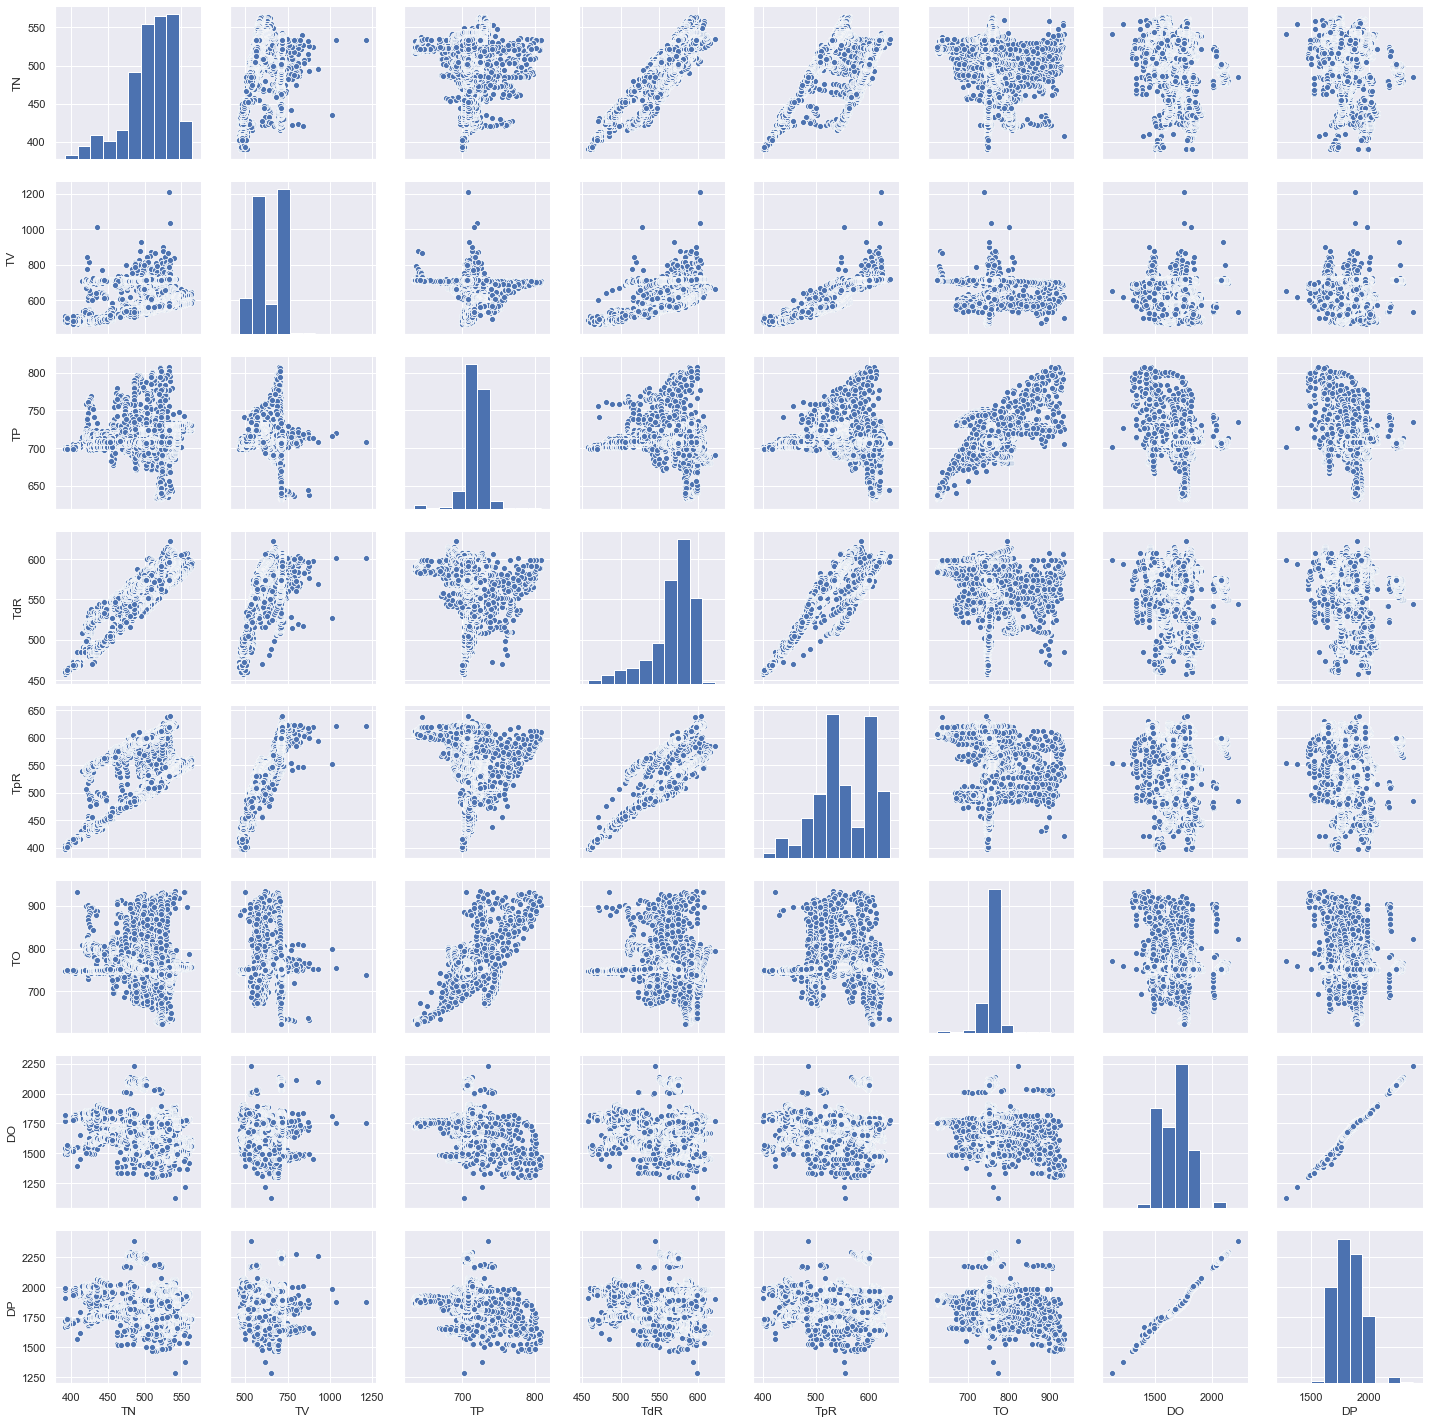

In [166]:
sns.set()
sns.pairplot(data_sens[data_sens.columns])

# 1718

# Модуль № 0008В9

1. Ввод питания фаза А  (100А)
2. Ввод питания фаза В  (100А)
3. Ввод питания фаза С (100А)
4. ПВ-17 фаза  А (50А)
5. ПВ-17 фаза  В (50А)
6. ПВ-17 фаза  С (50А)
7. ПВ-18 фаза  А (50А) не нужно
8. ПВ-18 фаза  В (50А) не нужно
9. ПВ-18 фаза  С (50А) не нужно


In [54]:
cols1 = ['time','id','Vvoda','Vvodb', 'Vvodc', 'A17', 'B17', 'C17', 'A18', 'B18', 'C18']
data1718 = pd.read_csv('data-0008B9.csv', names = cols1, header = 0) 
len(data1718)
data1718.drop(['A17', 'B17', 'C17','id'], axis = 1,inplace = True)

In [55]:
data1718.head()

time  Vvoda  Vvodb  Vvodc  A18   B18   C18
0  2019-03-01 11:42:09  24107  23924  23863   50  2211  2180
1  2019-03-01 11:41:51  24077  23985  23863   50  2195  2180
2  2019-03-01 11:41:33  24107  23924  23863   50  2195  2180
3  2019-03-01 11:41:14  24077  23955  23893   50  2195  2195
4  2019-03-01 11:40:56  24077  23924  23863   50  2226  2211

In [56]:
minutes1 = []
for i in range(len(data1718)):
    minute1 = data1718.time[i][:-3]
    minutes1.append(minute1)
data1718['minutes'] = minutes1
data1718

time  Vvoda  Vvodb  Vvodc  A18   B18   C18  \
0      2019-03-01 11:42:09  24107  23924  23863   50  2211  2180   
1      2019-03-01 11:41:51  24077  23985  23863   50  2195  2180   
2      2019-03-01 11:41:33  24107  23924  23863   50  2195  2180   
3      2019-03-01 11:41:14  24077  23955  23893   50  2195  2195   
4      2019-03-01 11:40:56  24077  23924  23863   50  2226  2211   
...                    ...    ...    ...    ...  ...   ...   ...   
99995  2019-02-08 02:50:46  24107  23924  23893   50   629   644   
99996  2019-02-08 02:50:28  24107  23955  23893   50   629   644   
99997  2019-02-08 02:50:09  24107  23955  23863   50   629   644   
99998  2019-02-08 02:49:51  24138  23924  23863   50   629   644   
99999  2019-02-08 02:49:33  24077  23924  23893   50   629   644   

                minutes  
0      2019-03-01 11:42  
1      2019-03-01 11:41  
2      2019-03-01 11:41  
3      2019-03-01 11:41  
4      2019-03-01 11:40  
...                 ...  
99995  2019-02-08 02:50  
99996  2019-02-08 02:50  
99997  2019-02-08 02:50  
99998  2019-02-08 02:49  
99999  2019-02-08 02:49  

[100000 rows x 8 columns]

In [57]:
result1718 = data1718.groupby(['minutes'], as_index=False).mean()
result1718.to_csv('PV1718_in_min.csv')
result1718

minutes         Vvoda         Vvodb         Vvodc   A18  \
0      2019-02-08 02:49  24107.500000  23924.000000  23878.000000  50.0   
1      2019-02-08 02:50  24107.000000  23944.666667  23883.000000  50.0   
2      2019-02-08 02:51  24127.666667  23944.666667  23852.333333  50.0   
3      2019-02-08 02:52  24099.500000  23924.000000  23863.000000  50.0   
4      2019-02-08 02:53  24097.000000  23934.333333  23863.000000  50.0   
...                 ...           ...           ...           ...   ...   
30744  2019-03-01 11:38  24107.000000  23924.000000  23862.666667  50.0   
30745  2019-03-01 11:39  24117.333333  23964.666667  23852.666667  50.0   
30746  2019-03-01 11:40  24107.250000  23954.750000  23862.750000  50.0   
30747  2019-03-01 11:41  24087.000000  23954.666667  23873.000000  50.0   
30748  2019-03-01 11:42  24107.000000  23924.000000  23863.000000  50.0   

               B18     C18  
0       629.000000   644.0  
1       629.000000   644.0  
2       629.000000   644.0  
3       629.000000   644.0  
4       629.000000   644.0  
...            ...     ...  
30744  2170.000000  2175.0  
30745  2195.333333  2170.0  
30746  2218.500000  2199.0  
30747  2195.000000  2185.0  
30748  2211.000000  2180.0  

[30749 rows x 7 columns]

In [58]:
df1 = pd.read_csv('PV18_in_min.csv',index_col='Unnamed: 0') 
df2 = pd.read_csv('PV1718_in_min.csv',index_col='Unnamed: 0') 

In [68]:
df = pd.merge(df1,df2)

In [69]:
df = df.drop('minutes', axis=1)

In [70]:
df = df.drop(['time','id'],axis = 1)
df

TN   TV   TP  TdR  TpR   TO    DO    DP     Vvoda         Vvodb  \
0      535  716  710  597  616  741  1752  1885  24077.00  23955.000000   
1      535  719  708  597  619  738  1738  1871  24077.00  23965.000000   
2      530  719  702  597  616  735  1732  1866  24053.75  23947.250000   
3      533  719  708  597  616  735  1732  1871  24053.75  23947.250000   
4      530  719  702  594  619  733  1732  1874  24053.75  23947.250000   
...    ...  ...  ...  ...  ...  ...   ...   ...       ...           ...   
84759  510  577  722  558  510  758  1743  1874  23812.00  23659.333333   
84760  510  583  722  560  510  758  1757  1885  23832.25  23680.000000   
84761  508  563  724  555  513  755  1774  1902  23954.75  23802.000000   
84762  508  558  722  555  513  755  1771  1907  23975.00  23812.000000   
84763  508  558  724  558  513  755  1771  1902  24036.00  23873.000000   

              Vvodc   A18      B18          C18  
0      23852.333333  50.0  2190.00  2190.333333  
1      23862.666667  50.0  2195.00  2195.333333  
2      23855.250000  50.0  2207.00  2222.250000  
3      23855.250000  50.0  2207.00  2222.250000  
4      23855.250000  50.0  2207.00  2222.250000  
...             ...   ...      ...          ...  
84759  23608.666667  50.0   614.00   644.000000  
84760  23603.250000  50.0   629.00   644.000000  
84761  23755.750000  50.0   617.75   644.000000  
84762  23761.000000  50.0   624.00   644.000000  
84763  23802.000000  50.0   629.00   644.000000  

[84764 rows x 14 columns]

In [74]:
df.columns

Index(['TN', 'TV', 'TP', 'TdR', 'TpR', 'TO', 'DO', 'DP', 'Vvoda', 'Vvodb',
       'Vvodc', 'A18', 'B18', 'C18'],
      dtype='object')

In [71]:
pearson = corr(df,'pearson')
pearson

TN        TV        TP       TdR       TpR        TO        DO  \
TN     0.000000 -0.041699  0.121718  0.787549  0.232773 -0.245662  0.110967   
TV    -0.041699  0.000000 -0.381448  0.544215  0.920528 -0.066204 -0.133555   
TP     0.121718 -0.381448  0.000000 -0.127704 -0.353867  0.771448 -0.093912   
TdR    0.787549  0.544215 -0.127704  0.000000  0.759597 -0.220461 -0.009096   
TpR    0.232773  0.920528 -0.353867  0.759597  0.000000 -0.167276 -0.118728   
TO    -0.245662 -0.066204  0.771448 -0.220461 -0.167276  0.000000 -0.135943   
DO     0.110967 -0.133555 -0.093912 -0.009096 -0.118728 -0.135943  0.000000   
DP     0.112674 -0.146127 -0.080181 -0.018662 -0.132245 -0.121737  0.987308   
Vvoda  0.163538 -0.531595  0.351525 -0.180769 -0.469276  0.050855  0.037583   
Vvodb  0.176226 -0.517717  0.348777 -0.160818 -0.451502  0.046360  0.029540   
Vvodc  0.169243 -0.557476  0.347465 -0.192102 -0.497393  0.036300  0.039516   
A18   -0.011070 -0.011069  0.000754 -0.014251 -0.011268 -0.004082 -0.006577   
B18   -0.199254  0.902241 -0.423126  0.381801  0.854528 -0.041434 -0.199647   
C18   -0.193710  0.897341 -0.427278  0.384457  0.850355 -0.046640 -0.212399   

             DP     Vvoda     Vvodb     Vvodc       A18       B18       C18  
TN     0.112674  0.163538  0.176226  0.169243 -0.011070 -0.199254 -0.193710  
TV    -0.146127 -0.531595 -0.517717 -0.557476 -0.011069  0.902241  0.897341  
TP    -0.080181  0.351525  0.348777  0.347465  0.000754 -0.423126 -0.427278  
TdR   -0.018662 -0.180769 -0.160818 -0.192102 -0.014251  0.381801  0.384457  
TpR   -0.132245 -0.469276 -0.451502 -0.497393 -0.011268  0.854528  0.850355  
TO    -0.121737  0.050855  0.046360  0.036300 -0.004082 -0.041434 -0.046640  
DO     0.987308  0.037583  0.029540  0.039516 -0.006577 -0.199647 -0.212399  
DP     0.000000  0.054933  0.046675  0.056656 -0.007506 -0.208831 -0.222880  
Vvoda  0.054933  0.000000  0.991066  0.988273  0.008167 -0.626951 -0.638260  
Vvodb  0.046675  0.991066  0.000000  0.989027  0.008510 -0.615982 -0.625785  
Vvodc  0.056656  0.988273  0.989027  0.000000  0.009298 -0.658888 -0.666890  
A18   -0.007506  0.008167  0.008510  0.009298  0.000000 -0.008849 -0.008743  
B18   -0.208831 -0.626951 -0.615982 -0.658888 -0.008849  0.000000  0.998190  
C18   -0.222880 -0.638260 -0.625785 -0.666890 -0.008743  0.998190  0.000000

In [72]:
corr_table(pearson)

Sensor Sensor max  Value max Sensor min  Value min
0      TN        TdR   0.787549         TO  -0.245662
1      TV        TpR   0.920528      Vvodc  -0.557476
2      TP         TO   0.771448        C18  -0.427278
3     TdR         TN   0.787549         TO  -0.220461
4     TpR         TV   0.920528      Vvodc  -0.497393
5      TO         TP   0.771448         TN  -0.245662
6      DO         DP   0.987308        C18  -0.212399
7      DP         DO   0.987308        C18  -0.222880
8   Vvoda      Vvodb   0.991066        C18  -0.638260
9   Vvodb      Vvoda   0.991066        C18  -0.625785
10  Vvodc      Vvodb   0.989027        C18  -0.666890
11    A18      Vvodc   0.009298        TdR  -0.014251
12    B18        C18   0.998190      Vvodc  -0.658888
13    C18        B18   0.998190      Vvodc  -0.666890

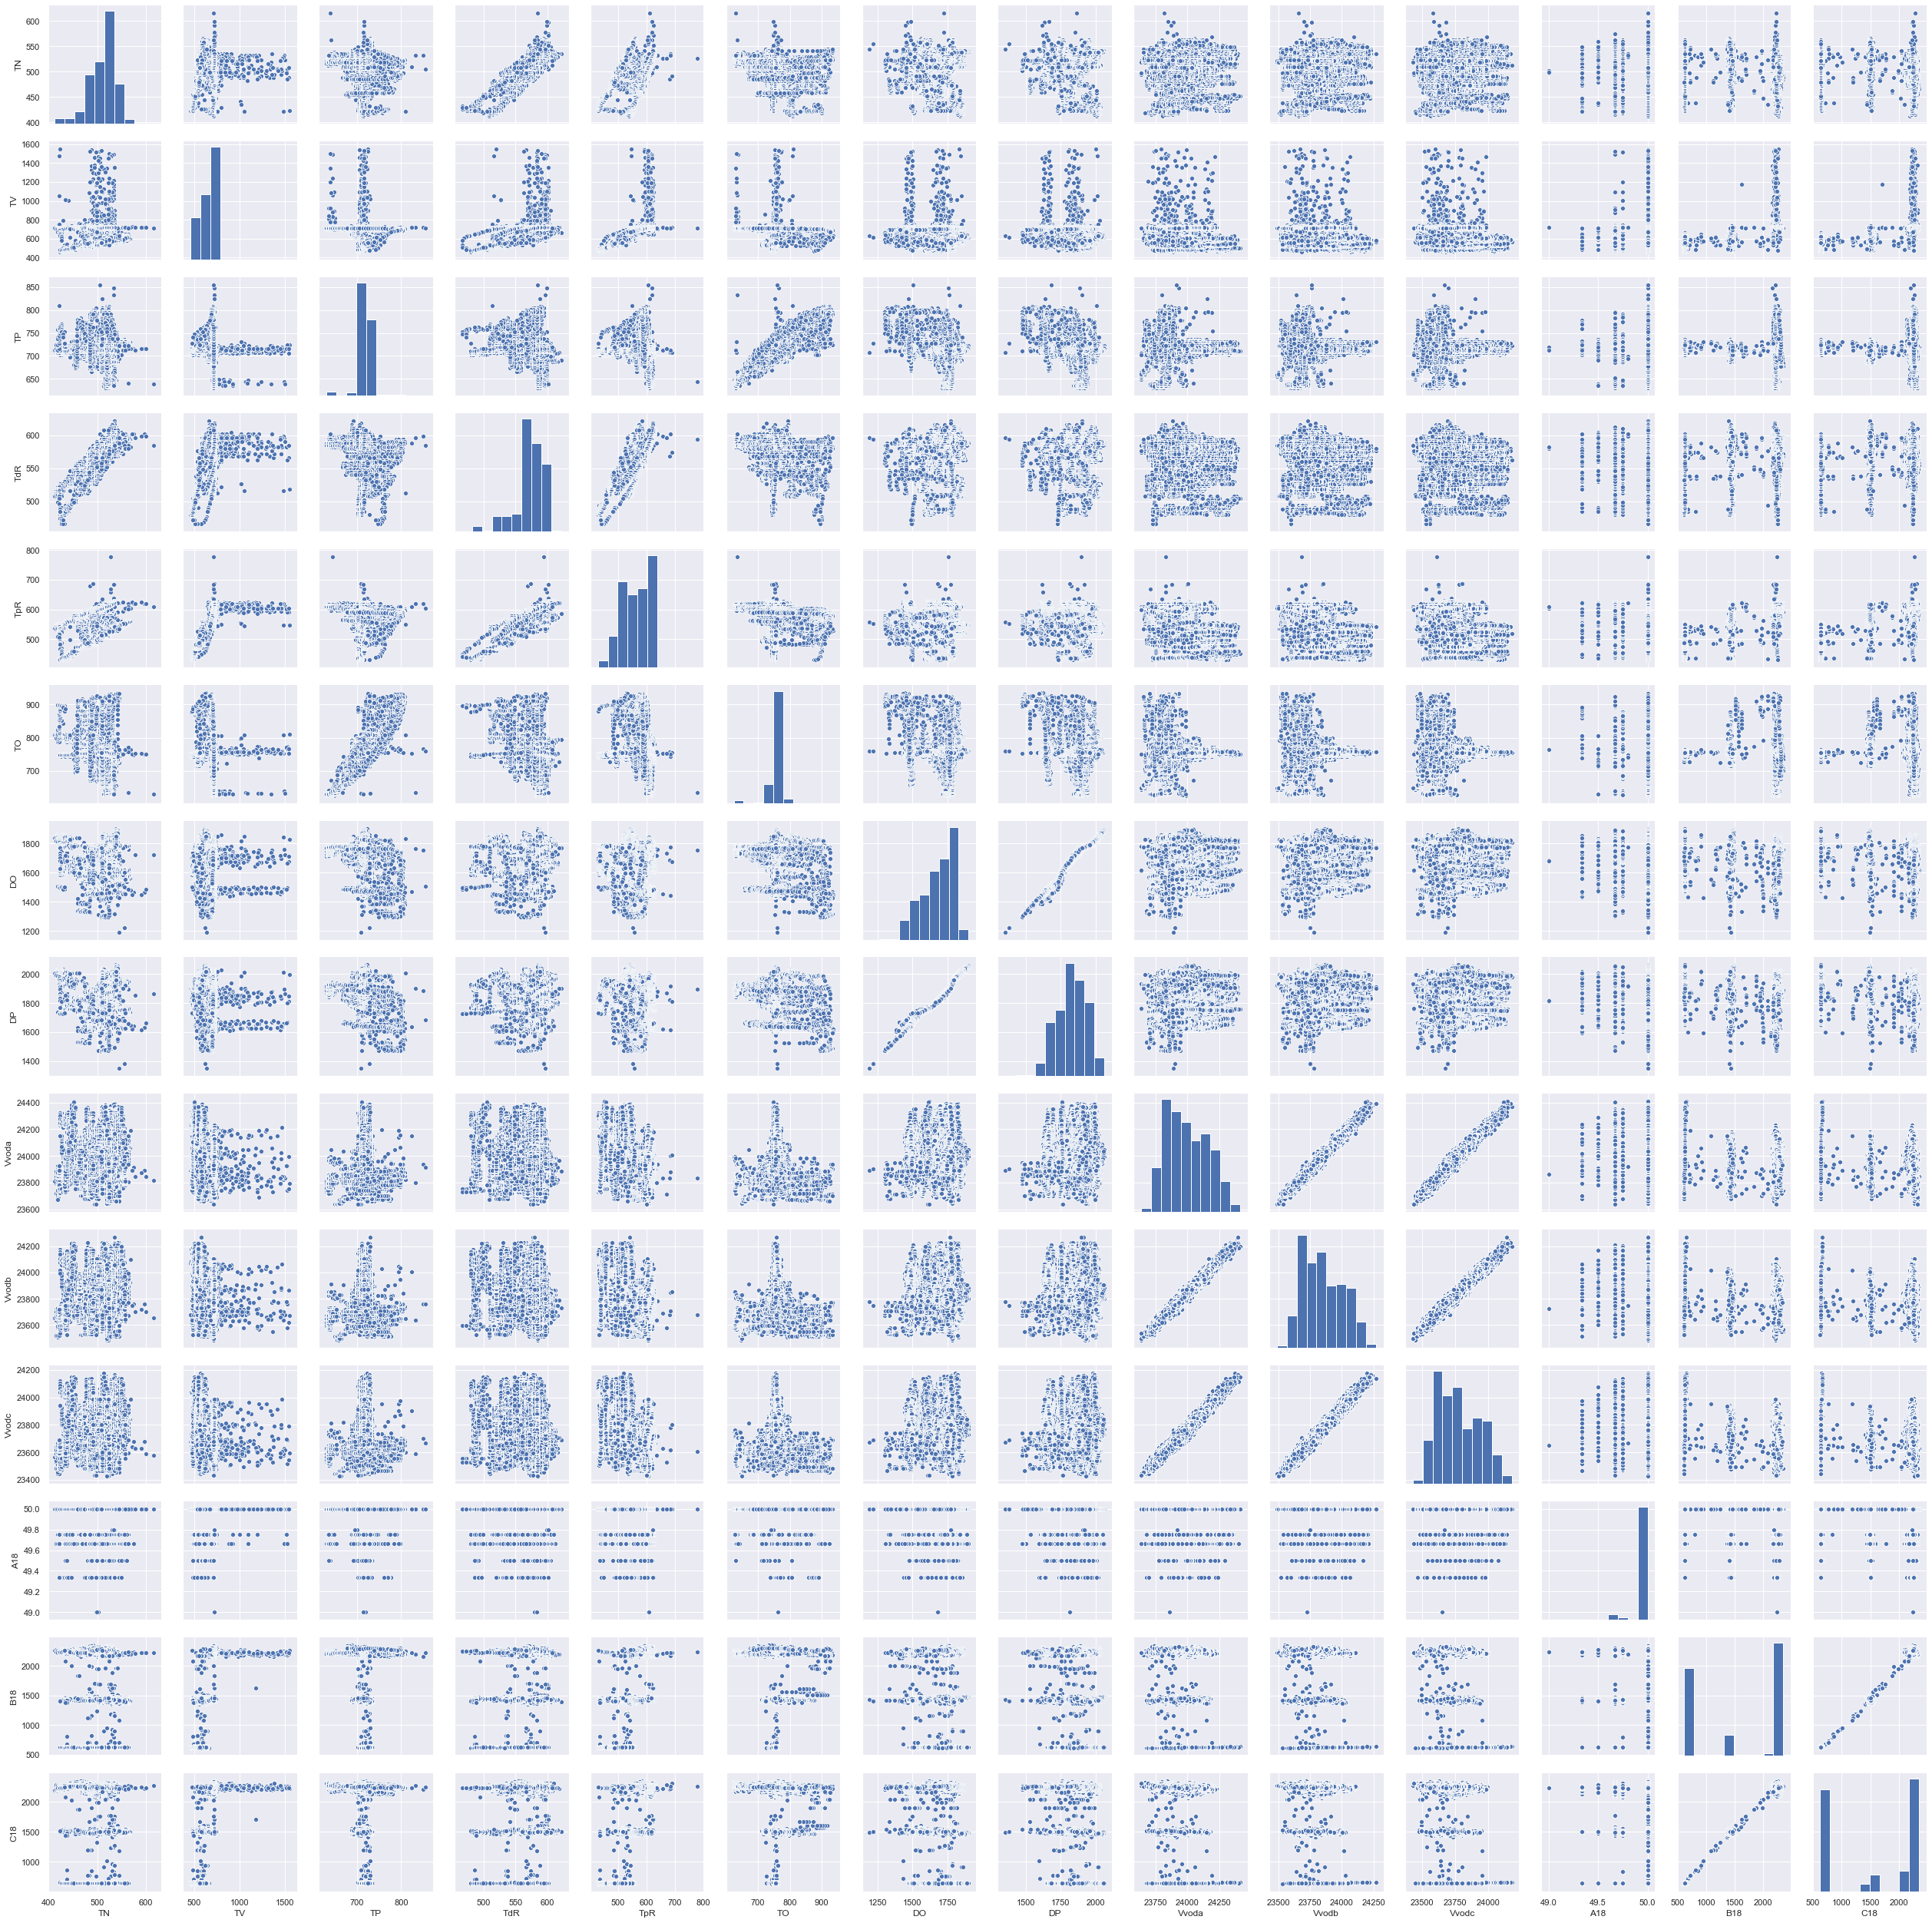

In [75]:
sns.set()
sns.pairplot(df[df.columns])